In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'cmu'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 13

my_colors = [[0.1,0.3,0.45],[0.65,0.35,0],[0.5,0.0,0.13],[0.08,0.48,0.31],[0.75,0.36,0.51],[0.99,0.86,0.18],[1.0,0.84,0.64]]

Pie chart for the repartition of the number of distinct polynomials found in the runs

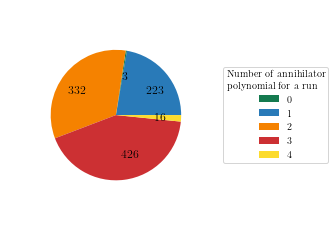

In [55]:
sizes = [223, 3, 332, 426, 16]

fig, ax = plt.subplots()
patches, texts = ax.pie(sizes, labels=sizes, labeldistance=.6, colors=[[0.16, 0.48, 0.72], my_colors[3], [0.96,0.51,0], [0.8,0.19,0.2], my_colors[5]], radius=0.75)
legend = plt.legend([patches[1],patches[0],patches[2],patches[3],patches[4]], [0,1,2,3,4], loc='center right', title='Number of annihilator\npolynomial for a run', bbox_to_anchor=(1.5, 0.5))
plt.setp(legend.get_title(), fontweight='bold')
plt.savefig('Piechart_n_pols.pdf', bbox_inches="tight")
plt.show()

In [25]:
patches